In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
def get_measurements(file):
    df = pd.read_csv(file, names=['loc1', 'loc2', 'speed', 'c_v', 'c_p', 'c_o', 'other', 'off_road', 'agents', 'throttle', 'steer'], index_col=None)
    speed = pd.to_numeric(df['speed'].str[:-4], downcast='float')
    throttle = pd.to_numeric(df['throttle'].str[10:], downcast='float')
    steer = pd.to_numeric(df['steer'].str[7:], downcast='float')
    return speed.tolist(),throttle.tolist(),steer.tolist()

In [27]:
# measure_path = "/home/mihir/Downloads/CARLA_0.8.2/PythonClient/_out/measurements/"
measure_path = "./measurements/"


# Loading measurement data
speed_arr = []
throttle_arr = []
steer_arr = []

# for file in glob.glob(path):
for i in range(229):
    with open(measure_path+str(i)+".txt") as file:
        speed,throttle,steer = get_measurements(file)
        speed_arr += (speed)
        throttle_arr += (throttle)
        steer_arr += (steer)

In [28]:
# Creating dataframe: episode_number, center_image_path, steer, speed, throttle
df = pd.DataFrame(list(zip(steer_arr, speed_arr, throttle_arr)), columns=['steer','speed','throttle'])
# Writing to CSV
# df.to_csv("train.csv")

In [29]:
steer = df.steer.values

In [30]:
steer

array([-7.92367136e-05, -7.96726745e-05, -7.96726745e-05, ...,
        5.57795912e-03,  4.94232168e-03,  4.30722907e-03])

In [31]:
len(steer)

114500

(array([3.40000e+01, 3.60000e+01, 6.05000e+02, 1.39000e+03, 1.80600e+03,
        1.07674e+05, 1.75400e+03, 4.88000e+02, 5.39000e+02, 1.74000e+02]),
 array([-0.9699918 , -0.78222011, -0.59444841, -0.40667672, -0.21890502,
        -0.03113332,  0.15663837,  0.34441007,  0.53218176,  0.71995346,
         0.90772516]),
 <a list of 10 Patch objects>)

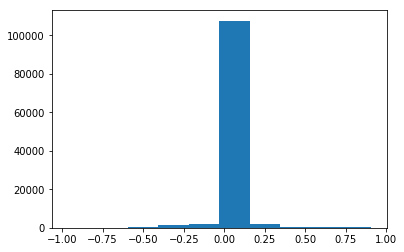

In [32]:
plt.hist(steer)

In [33]:
np.count_nonzero(steer)

114489